                            OLS Regression Results                            
Dep. Variable:       Revenue_5y_ahead   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                   0.06194
Date:                Wed, 05 Nov 2025   Prob (F-statistic):              0.806
Time:                        14:19:34   Log-Likelihood:                -151.41
No. Observations:                  25   AIC:                             306.8
Df Residuals:                      23   BIC:                             309.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        237.7277     61.934      3.838      0.0

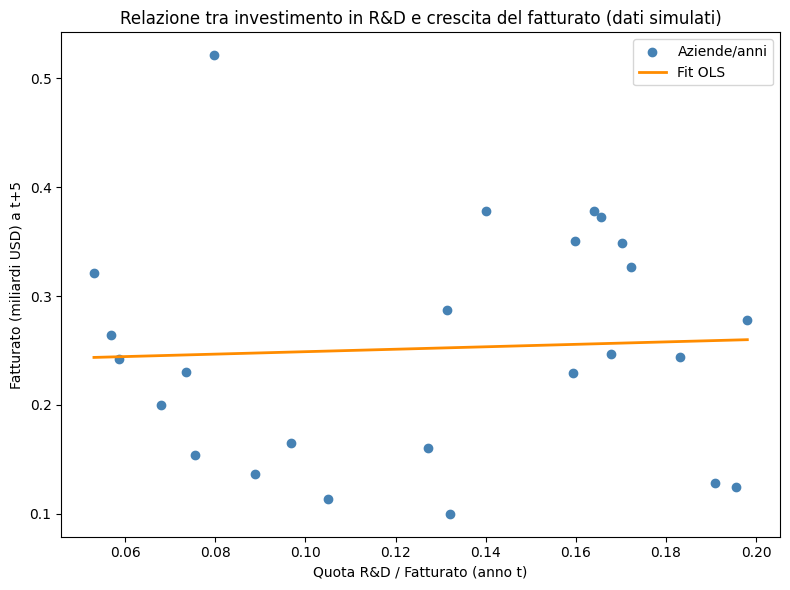

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(42)

# 1️⃣ Costruisco dati verosimili per 5 aziende su 10 anni
companies = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]
years = np.arange(2010, 2020)
rows = []

for c in companies:
    base_rev = np.random.uniform(50, 300)  # fatturato iniziale (mld USD)
    for y in years:
        rev = base_rev * (1 + np.random.uniform(0.05, 0.20)) ** (y - 2010)
        rnd_ratio = np.random.uniform(0.05, 0.20)  # % di fatturato speso in R&D
        rnd_spend = rev * rnd_ratio
        rows.append([c, y, rev, rnd_spend, rnd_ratio])

df = pd.DataFrame(
    rows, columns=["Company", "Year", "Revenue", "R&D_spending", "R&D_ratio"]
)

# 2️⃣ Creo la variabile "Revenue 5 anni dopo"
df = df.sort_values(["Company", "Year"])
df["Revenue_5y_ahead"] = df.groupby("Company")["Revenue"].shift(-5)

# 3️⃣ Teniamo solo righe con entrambi i dati
df = df.dropna(subset=["Revenue_5y_ahead"])

# 4️⃣ Regressione lineare: Revenue futuro ~ R&D ratio
X = sm.add_constant(df["R&D_ratio"])
y = df["Revenue_5y_ahead"]
model = sm.OLS(y, X).fit()

print(model.summary())

# 5️⃣ Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    df["R&D_ratio"],
    df["Revenue_5y_ahead"] / 1e3,
    color="steelblue",
    label="Aziende/anni",
)
x_line = np.linspace(df["R&D_ratio"].min(), df["R&D_ratio"].max(), 100)
y_line = model.params["const"] + model.params["R&D_ratio"] * x_line
plt.plot(x_line, y_line / 1e3, color="darkorange", linewidth=2, label="Fit OLS")

plt.xlabel("Quota R&D / Fatturato (anno t)")
plt.ylabel("Fatturato (miliardi USD) a t+5")
plt.title("Relazione tra investimento in R&D e crescita del fatturato (dati simulati)")
plt.legend()
plt.tight_layout()
plt.show()